In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('result', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,BronchialTree,MaxDvh,AtMost,1560,38.87
1,BronchialTree,MaxDose,AtMost,3480,NaN
2,ChestWall,MaxDvh,AtMost,3000,3.42
3,D2cm,MaxDose,AtMost,2600,NaN
4,Esophagus,MaxDvh,AtMost,1880,30.71
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVessels,MaxDvh,AtMost,4300,4.75
7,GreatVessels,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2880,1.61
9,Heart,MaxDose,AtMost,3400,NaN


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,BronchialTree,MaxDvh,1560,38.87,NaN,1
1,BronchialTree,MaxDose,3480,0.00,NaN,1
2,ChestWall,MaxDvh,3000,3.42,NaN,1
3,D2cm,MaxDose,2600,0.00,NaN,1
4,Esophagus,MaxDvh,1880,30.71,NaN,1
5,Esophagus,MaxDose,3000,0.00,NaN,1
6,GreatVessels,MaxDvh,4300,4.75,NaN,1
7,GreatVessels,MaxDose,4900,0.00,NaN,1
8,Heart,MaxDvh,2880,1.61,NaN,1
9,Heart,MaxDose,3400,0.00,NaN,1


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,BronchialTree,MaxDvh,1560.0,273.597840,-82.461677
1,BronchialTree,MaxDose,3480.0,1391.393433,-60.017430
2,ChestWall,MaxDvh,3000.0,2491.517059,-16.949431
3,D2cm,MaxDose,2600.0,3171.471436,21.979671
4,Esophagus,MaxDvh,1880.0,164.613152,-91.243981
5,Esophagus,MaxDose,3000.0,625.061707,-79.164610
6,GreatVessels,MaxDvh,4300.0,515.070792,-88.021609
7,GreatVessels,MaxDose,4900.0,754.032227,-84.611587
8,Heart,MaxDvh,2880.0,2019.565764,-29.876189
9,Heart,MaxDose,3400.0,4215.619629,23.988813


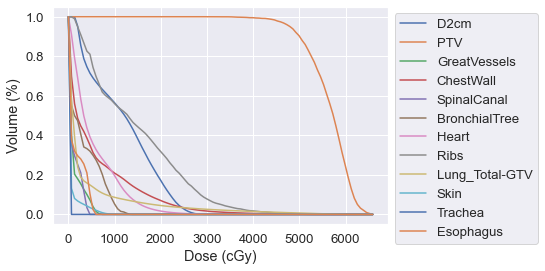

In [7]:
# Dose-volume histograms
result.dvhplot()

In [8]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 1149.77, Linear-Quadratic: -1428.36
